# **Importing Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing the Dataset**

In [2]:
df = pd.read_csv("/kaggle/input/walmart-sales-dataset/walmart.csv")

In [3]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [6]:
df.shape

(550068, 10)

# **Exploratory Data Analysis**

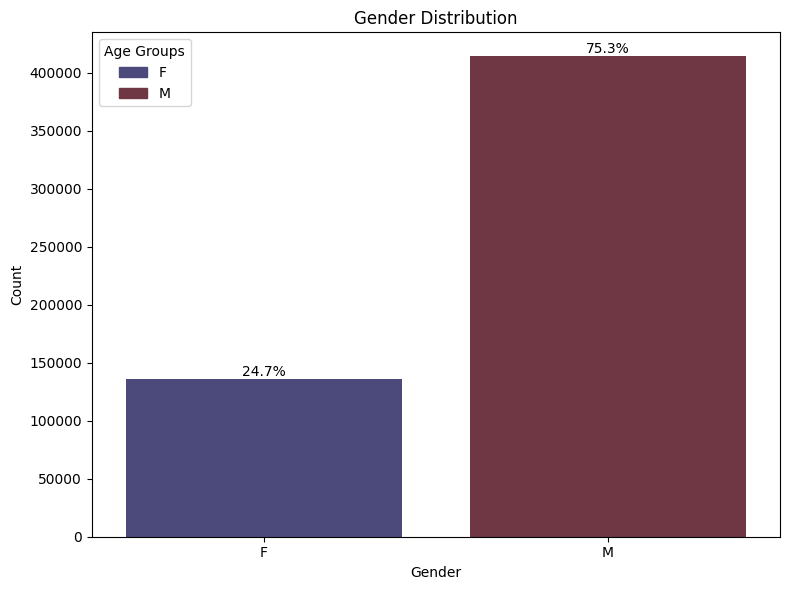

In [7]:
import matplotlib.patches as mpatches

# Gender Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', data=df, palette='icefire')

# Calculate percentages
total = len(df['Gender'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Setting title and labels
ax.set_title('Gender Distribution')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

# Creating legend
colors = [p.get_facecolor() for p in ax.patches]
gender_groups = df['Gender'].unique()
gender_groups.sort()
patches = [mpatches.Patch(color=colors[i], label=age_group) for i, age_group in enumerate(gender_groups)]
ax.legend(handles=patches, title='Age Groups')

plt.tight_layout()
plt.show()

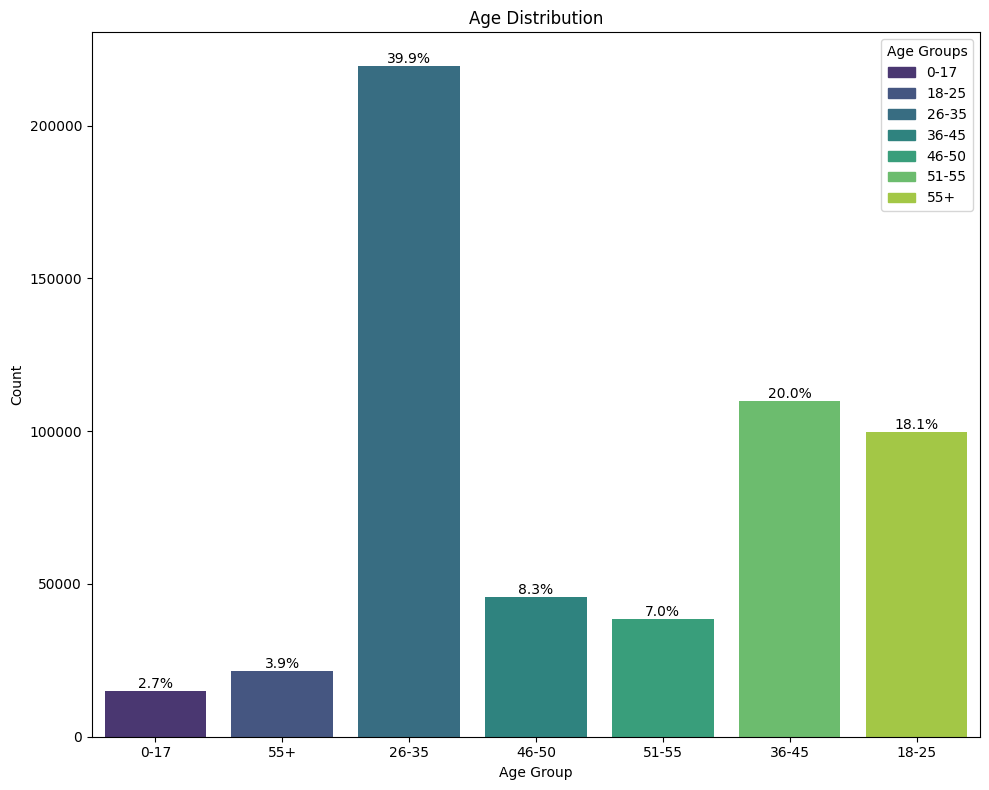

In [8]:
# Age Distribution
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Age', data=df, palette='viridis')

# Calculate percentages
total = len(df['Age'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Setting title and labels
ax.set_title('Age Distribution')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')

# Creating legend
colors = [p.get_facecolor() for p in ax.patches]
age_groups = df['Age'].unique()
age_groups.sort()
patches = [mpatches.Patch(color=colors[i], label=age_group) for i, age_group in enumerate(age_groups)]
ax.legend(handles=patches, title='Age Groups')

plt.tight_layout()
plt.show()

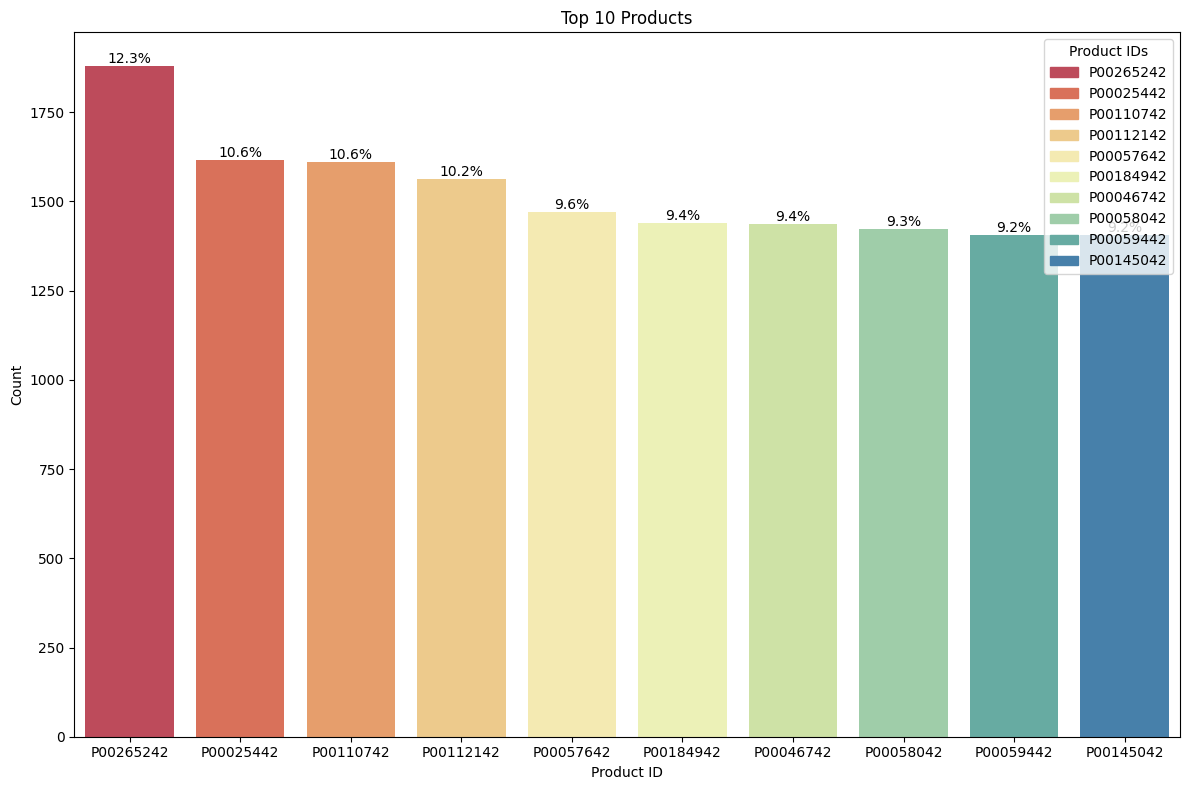

In [9]:
# Top 10 products
top_product_ids = df['Product_ID'].value_counts().head(10).index
df_top_products = df[df['Product_ID'].isin(top_product_ids)]

# Plotting with seaborn
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Product_ID', data=df_top_products, palette='Spectral', order=top_product_ids)

# Calculate percentages
total = len(df_top_products)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Setting title and labels
ax.set_title('Top 10 Products')
ax.set_xlabel('Product ID')
ax.set_ylabel('Count')

# Creating legend
colors = [p.get_facecolor() for p in ax.patches]
patches = [mpatches.Patch(color=colors[i], label=product_id) for i, product_id in enumerate(top_product_ids)]
ax.legend(handles=patches, title='Product IDs')

plt.tight_layout()
plt.show()

/tmp/ipykernel_18/1032617419.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Purchase'], bins=50, kde=True, palette='icefire')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


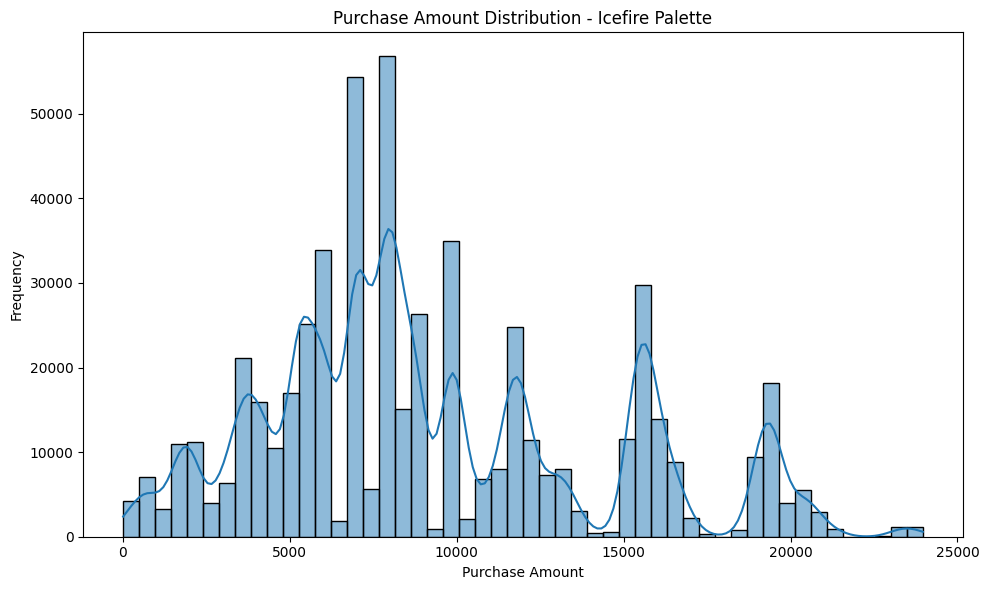

In [10]:
# Using the "icefire" color palette
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], bins=50, kde=True, palette='icefire')
plt.title('Purchase Amount Distribution - Icefire Palette')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

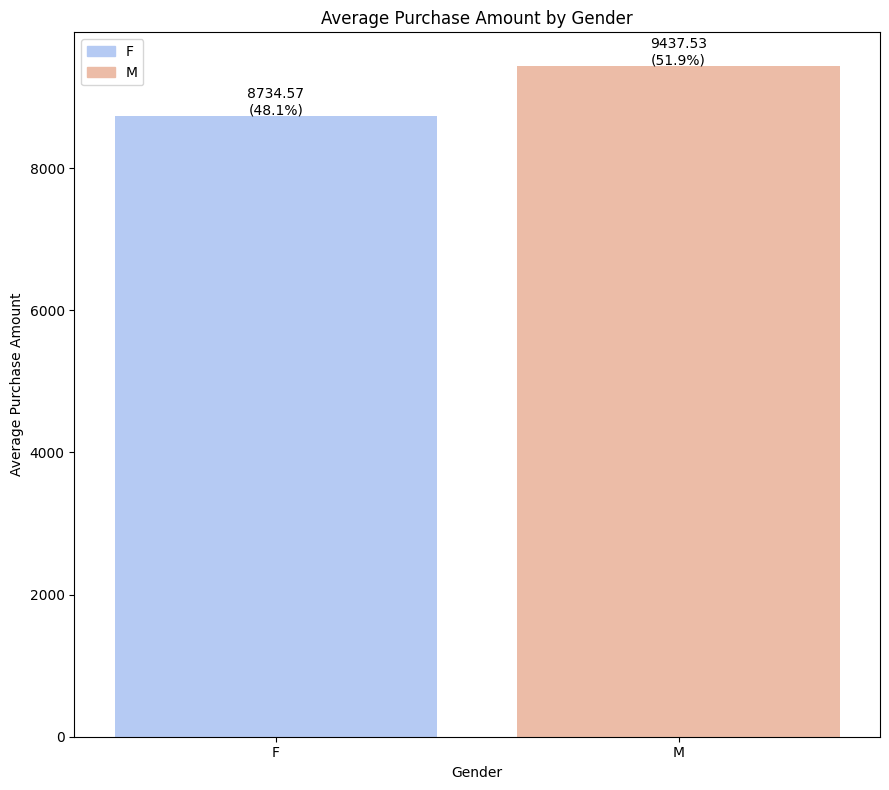

In [11]:
# Calculate average purchase amount by gender
gender_purchase_avg = df.groupby('Gender')['Purchase'].mean()
gender_purchase_avg_df = gender_purchase_avg.reset_index()
gender_purchase_avg_df.columns = ['Gender', 'Average Purchase Amount']

# Calculate percentage
total_avg_purchase = gender_purchase_avg_df['Average Purchase Amount'].sum()
gender_purchase_avg_df['Percentage'] = gender_purchase_avg_df['Average Purchase Amount'] / total_avg_purchase * 100

# Plotting with seaborn
plt.figure(figsize=(9, 8))
ax = sns.barplot(x='Gender', y='Average Purchase Amount', data=gender_purchase_avg_df, palette='coolwarm')

# Annotate bars with percentage
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}\n({p.get_height() / total_avg_purchase * 100:.1f}%)", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Setting title and labels
ax.set_title('Average Purchase Amount by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Average Purchase Amount')

# Adding legend manually
colors = [p.get_facecolor() for p in ax.patches]
gender_groups = df['Gender'].unique()
gender_groups.sort()
patches = [mpatches.Patch(color=colors[i], label=age_group) for i, age_group in enumerate(gender_groups)]
ax.legend(handles=patches)

plt.tight_layout()
plt.show()

Frequency of Product Purchases by Age Group:
Product_Category     1     2     3     4      5     6     7      8    9   \
Age                                                                        
0-17               3585   805  1200   758   4330   399    53   2258   16   
18-25             26962  4428  4710  2463  28522  3749   481  17911   63   
26-35             58249  8928  7662  4192  61473  8485  1651  44256  154   
36-45             27648  4912  3854  2354  29377  3899   809  23296  107   
46-50             10474  2105  1376   990  11971  1622   327  10656   33   
51-55              9049  1781   924   678   9893  1450   266   9340   29   
55+                4411   905   487   318   5367   862   134   6208    8   

Product_Category    10    11    12    13   14    15    16   17    18   19   20  
Age                                                                             
0-17               111   740   125   112   39   160   229    6    27   59   90  
18-25              603  459

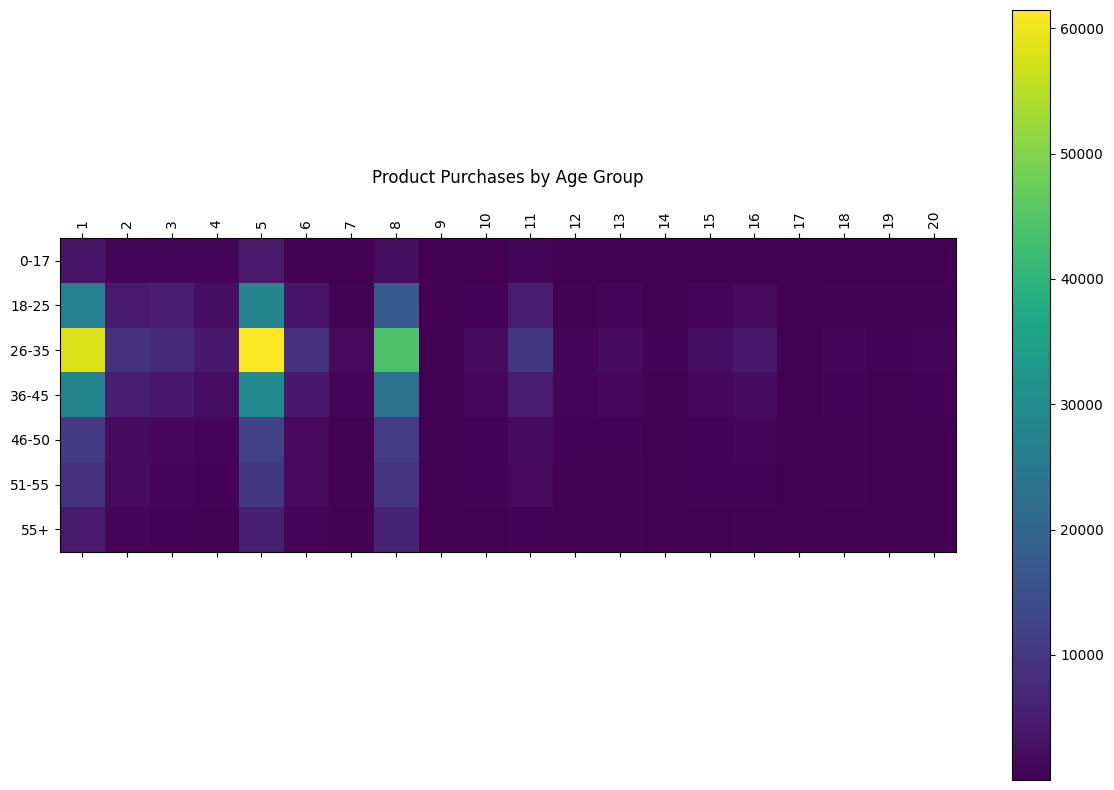

In [12]:
# Calculate the frequency of product purchases across different age groups
age_product_freq = df.groupby(['Age', 'Product_Category']).size().unstack().fillna(0)

print("Frequency of Product Purchases by Age Group:")
print(age_product_freq)

# Plot heatmap of product purchases by age group
fig, ax = plt.subplots(figsize=(12, 8))
cax = ax.matshow(age_product_freq, cmap='viridis')
fig.colorbar(cax)
ax.set_xticks(range(len(age_product_freq.columns)))
ax.set_xticklabels(age_product_freq.columns, rotation=90)
ax.set_yticks(range(len(age_product_freq.index)))
ax.set_yticklabels(age_product_freq.index)
ax.set_title('Product Purchases by Age Group', pad=20)
plt.tight_layout()
plt.show()

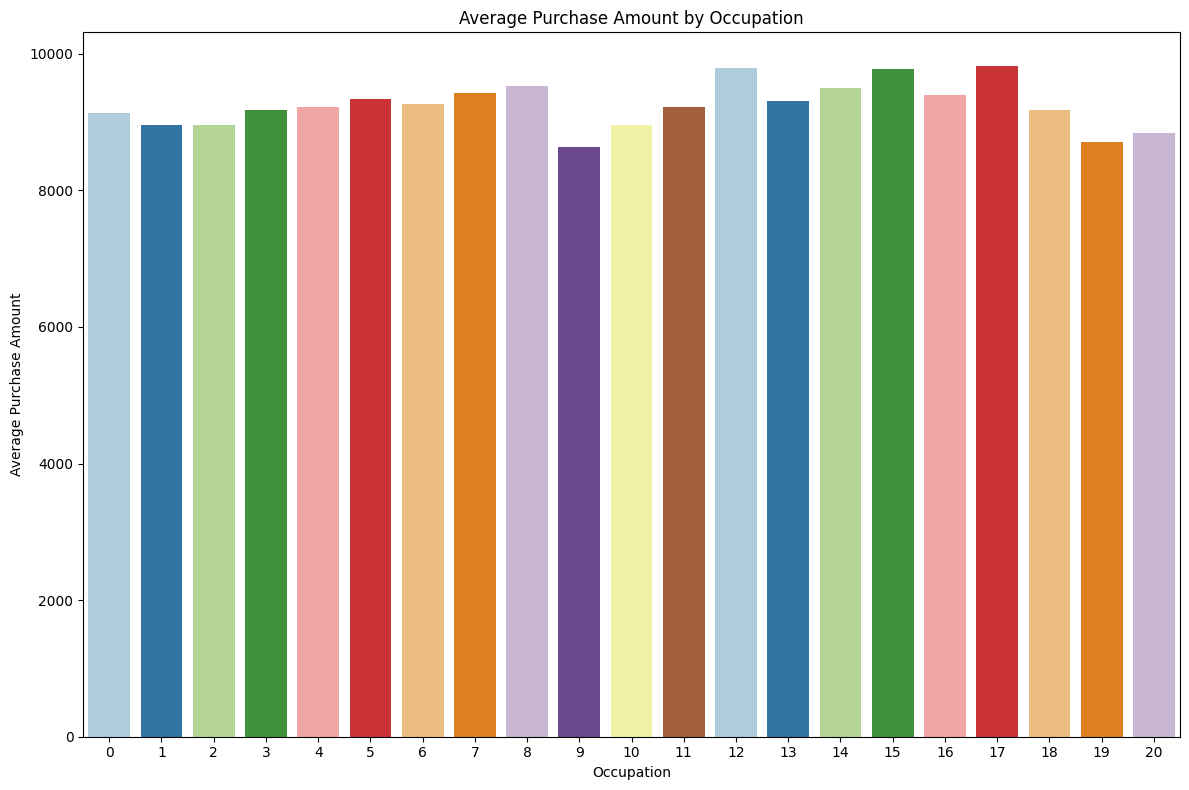

In [13]:
# Calculate average purchase amount by occupation
occupation_purchase_avg = df.groupby('Occupation')['Purchase'].mean()
occupation_purchase_avg_df = occupation_purchase_avg.reset_index()
occupation_purchase_avg_df.columns = ['Occupation', 'Average Purchase Amount']

# Plotting with seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Occupation', y='Average Purchase Amount', data=occupation_purchase_avg_df, palette='Paired')

# Setting title and labels
ax.set_title('Average Purchase Amount by Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Average Purchase Amount')

plt.tight_layout()
plt.show()

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [15]:
df['Gender'] = df['Gender'].replace({'M': 1, 'F': 0})

/tmp/ipykernel_18/2521965824.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'M': 1, 'F': 0})


# **Understanding the Relationship of the Columns**

<Axes: title={'center': 'Purchase'}, xlabel='Gender'>

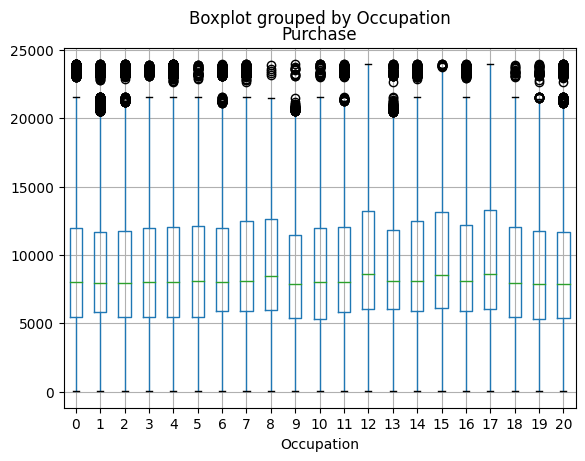

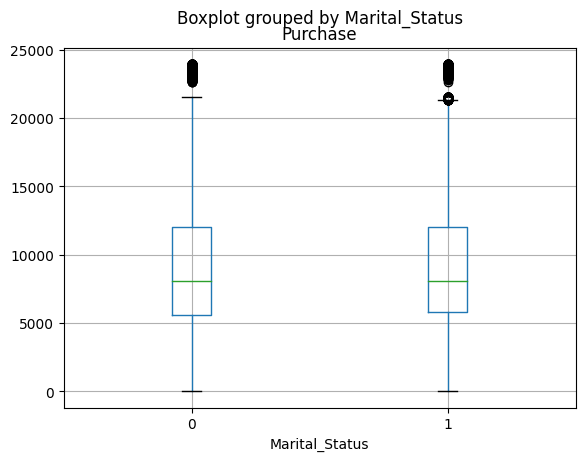

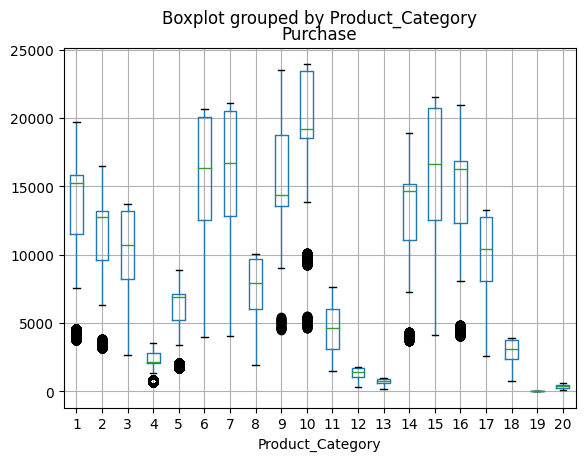

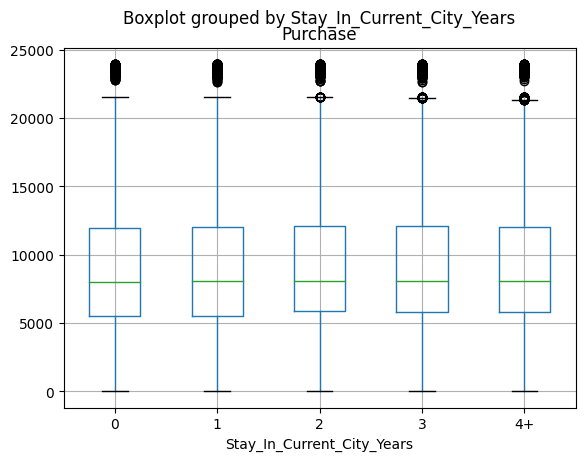

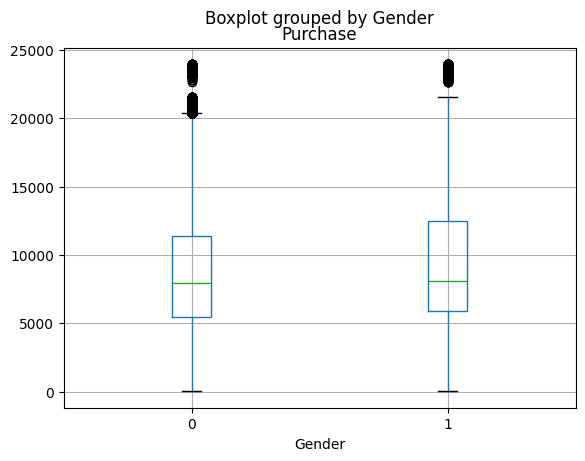

In [16]:
df.boxplot("Purchase", by = "Occupation")
df.boxplot("Purchase", by = "Marital_Status")
df.boxplot("Purchase", by = "Product_Category")
df.boxplot("Purchase", by = "Stay_In_Current_City_Years")
df.boxplot("Purchase", by = "Gender")

In [17]:
# Convert '4+' to 4
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4)

# Convert the column to numeric
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'])

In [18]:
# Convert '55+' to 55
df['Age'] = df['Age'].replace('55+', 55)

In [19]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,1057
4,1000002,P00285442,1,55,16,C,4,0,8,7969


# **Creating Pipeline and Encoding**

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config
from copy import deepcopy

In [21]:
num_features = ['Purchase']
cat_features = ['Gender',
                'Age',
                'Occupation',
                'City_Category',
                'Stay_In_Current_City_Years',
                'Marital_Status',
                'Product_Category']

In [22]:
num_features = pd.DataFrame(df['Purchase'])
num_features

,Purchase
0,8370
1,15200
2,1422
3,1057
4,7969
...,...
550063,368
550064,371
550065,137
550066,365


In [23]:
cat_features = pd.DataFrame(df[['Gender',
                'Age',
                'Occupation',
                'City_Category',
                'Stay_In_Current_City_Years',
                'Marital_Status',
                'Product_Category']])
cat_features

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
0,0,0-17,10,A,2,0,3
1,0,0-17,10,A,2,0,1
2,0,0-17,10,A,2,0,12
3,0,0-17,10,A,2,0,12
4,1,55,16,C,4,0,8
...,...,...,...,...,...,...,...
550063,1,51-55,13,B,1,1,20
550064,0,26-35,1,C,3,0,20
550065,0,26-35,15,B,4,1,20
550066,0,55,1,C,2,0,20


In [24]:
X = cat_features
y = num_features

In [25]:
X.dtypes

Gender                         int64
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category               int64
dtype: object

In [26]:
y.dtypes

Purchase    int64
dtype: object

In [27]:
X

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
0,0,0-17,10,A,2,0,3
1,0,0-17,10,A,2,0,1
2,0,0-17,10,A,2,0,12
3,0,0-17,10,A,2,0,12
4,1,55,16,C,4,0,8
...,...,...,...,...,...,...,...
550063,1,51-55,13,B,1,1,20
550064,0,26-35,1,C,3,0,20
550065,0,26-35,15,B,4,1,20
550066,0,55,1,C,2,0,20


In [28]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        #Age Numeric
        age_dct = {"0-17": 0, "18-25": 1, "26-35": 2, "36-45": 3, "46-50": 4, "51-55": 5, "55+": 6}
        X = X.copy()  # Avoid SettingWithCopyWarning
        X["Age"] = X["Age"].map(age_dct)
                
        #City_Category One Hot Encoding
        ohe = OneHotEncoder()
        matrix = ohe.fit_transform(X[["City_Category"]]).toarray()
        
        column_names = ["City_Cat_A", "City_Cat_B", "City_Cat_C"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        X = X.drop(columns = ["City_Category"], axis=1)
        
        #Occupation One Hot Encoding
        ohe = OneHotEncoder()
        matrix = ohe.fit_transform(X[["Occupation"]]).toarray()
        
        column_names = ["Occupation_" + str(i) for i in range(21)]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        X = X.drop(columns = ["Occupation"], axis=1)
        
        #Product_Category One Hot Encoding
        ohe = OneHotEncoder()
        matrix = ohe.fit_transform(X[["Product_Category"]]).toarray()
        
        column_names = ["Product_Category_" + str(i) for i in range(20)]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        X = X.drop(columns = ["Product_Category"], axis=1)
        
        return X

# Define the pipeline
prepipe = Pipeline([
    ('preprocessor', FeatureEncoder()),
    ('encoder', OneHotEncoder())
])

# Fit the pipeline
X= prepipe.fit_transform(X)

In [29]:
X = pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [30]:
scaler = RobustScaler().fit(y)
y = scaler.transform(y)
y = pd.DataFrame(y)
y

,0
0,0.051838
1,1.147970
2,-1.063232
3,-1.121810
4,-0.012518
...,...
550063,-1.232386
550064,-1.231905
550065,-1.269459
550066,-1.232868


# **Splitting Data into Train and Test Data**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
178247,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
196647,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
418590,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
408727,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
216416,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
259178,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
365838,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
131932,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [33]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
84432,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
72724,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197032,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
353704,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
91198,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
138718,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
22886,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
137110,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [34]:
pipeline1 = Pipeline([
    ('regressor', LinearRegression())
])
pipeline1.fit(X_train, y_train)
pipeline1.fit(X_test, y_test)

Pipeline(steps=[('regressor', LinearRegression())])

In [35]:
train = pipeline1.score(X_train, y_train)
print('Linear Regression on trained data: ', train)

Linear Regression on trained data:  0.6412349503719417


In [36]:
test = pipeline1.score(X_test, y_test)
print('Linear Regression on test data: ', test)

Linear Regression on test data:  0.6339638368146279


In [37]:
pipeline2 = Pipeline([
    ('regressor', DecisionTreeRegressor())
])
pipeline2.fit(X_train, y_train)
pipeline2.fit(X_test, y_test)

Pipeline(steps=[('regressor', DecisionTreeRegressor())])

In [38]:
train = pipeline2.score(X_train, y_train)
print('Decision Tree Regressor on trained data: ', train)

Decision Tree Regressor on trained data:  0.6075375881518854


In [39]:
from sklearn.metrics import r2_score 
y_pred = pipeline2.predict(X_test)
score = r2_score(y_test, y_pred)
print(f'R^2 Score: {score}')

R^2 Score: 0.7245386549958128
